In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import importlib
from termcolor import colored, cprint
import warnings

seed=10

## Funciones

In [128]:
sys.path.append('../src/')
import functions_rfc as fr
sys.path.remove('../src/')

### Constantes:
seed=10

In [129]:
sys.path.append('../src/')
importlib.reload(fr)
sys.path.remove('../src/')

In [130]:
train = pd.read_csv('../data/raw/cell2celltrain.csv')
holdout = pd.read_csv('../data/raw/cell2cellholdout.csv')
display(train.head(), holdout.head())

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


## General

In [131]:
train.describe().T.style.format("{:.2f}")

,count,mean,std,min,25%,50%,75%,max
CustomerID,51047.00,3201956.88,116905.56,3000002.00,3100632.00,3201534.00,3305376.00,3399994.00
MonthlyRevenue,50891.00,58.83,44.51,-6.17,33.61,48.46,71.06,1223.38
MonthlyMinutes,50891.00,525.65,529.87,0.00,158.00,366.00,723.00,7359.00
TotalRecurringCharge,50891.00,46.83,23.85,-11.00,30.00,45.00,60.00,400.00
DirectorAssistedCalls,50891.00,0.90,2.23,0.00,0.00,0.25,0.99,159.39
OverageMinutes,50891.00,40.03,96.59,0.00,0.00,3.00,41.00,4321.00
RoamingCalls,50891.00,1.24,9.82,0.00,0.00,0.00,0.30,1112.40
PercChangeMinutes,50680.00,-11.55,257.51,-3875.00,-83.00,-5.00,66.00,5192.00
PercChangeRevenues,50680.00,-1.19,39.57,-1107.70,-7.10,-0.30,1.60,2483.50
DroppedCalls,51047.00,6.01,9.04,0.00,0.70,3.00,7.70,221.70


In [132]:
train.columns

Index(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
       'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
       'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
       'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'ServiceArea', 'Handsets', 'HandsetModels',
       'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2', 'ChildrenInHH',
       'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner',
       'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
       'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard',
       'RetentionCalls', 'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'IncomeGro

## Target y Treatment

In [133]:
pd.DataFrame(train.RetentionCalls.value_counts(normalize=True)).style.format("{:.2%}")

,proportion
RetentionCalls,
0,96.58%
1,3.15%
2,0.24%
3,0.03%
4,0.00%


In [134]:
train.Churn.value_counts(normalize=True)

Churn
No     0.711815
Yes    0.288185
Name: proportion, dtype: float64

In [135]:
train['Churn'] = train['Churn'].map({'Yes': 1, 'No': 0})

In [278]:
train.RetentionCalls.value_counts(normalize=True)

RetentionCalls
0    0.965816
1    0.031520
2    0.002351
3    0.000274
4    0.000039
Name: proportion, dtype: float64

In [136]:
#pd.DataFrame(train.groupby('Churn').RetentionCalls.value_counts(normalize=True)).style.format("{:.2%}")
#train.pivot_table(index='RetentionCalls', columns='Churn', values='CustomerID', aggfunc='count', fill_value=0, margins=True)

pd.concat([train[train.Churn == 1].RetentionCalls.value_counts(normalize=True)
          ,train[train.Churn == 0].RetentionCalls.value_counts(normalize=True)]
          ,axis=1
          ,keys=['Churn', 'No Churn'])\
         .fillna(0)\
         .style.format("{:.2%}").background_gradient(cmap='Blues', low=0, high=1)

,Churn,No Churn
RetentionCalls,,
0,94.66%,97.36%
1,4.92%,2.44%
2,0.36%,0.18%
3,0.05%,0.02%
4,0.01%,0.00%


1. Puede que si se llama a quienes tengan probabilidades muy altas de fuga, se los termine convenciendo de fugarse
2. También puede que se llame a los que más probabilidad tienen de fugarse y, por ende, ya exista un sesgo. Por llamar justamente a los que más probablemente se fuguen, de manera casi inevitable.

In [271]:
pd.concat([train[train.Churn == 1].RetentionOffersAccepted.value_counts(normalize=True)
          ,train[train.Churn == 0].RetentionOffersAccepted.value_counts(normalize=True)]
          ,axis=1
          ,keys=['Churn', 'No Churn'])\
         .fillna(0)\
         .style.format("{:.2%}").background_gradient(cmap='Blues', low=0, high=1)

,Churn,No Churn
RetentionOffersAccepted,,
0,97.54%,98.57%
1,2.33%,1.36%
2,0.11%,0.06%
3,0.02%,0.01%


In [277]:
train[['RetentionCalls', 'RetentionOffersAccepted','Churn']].corr().style.format("{:.2f}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=0, vmin=-1, vmax=1)

,RetentionCalls,RetentionOffersAccepted,Churn
RetentionCalls,1.00,0.73,0.07
RetentionOffersAccepted,0.73,1.00,0.03
Churn,0.07,0.03,1.00


En principio pareciese que si se llama a los clientes, más chances hay de que se fuguen... Esto seguramente pueda estar sesgado, ya que no es trivial que se llame a los que se terminan fugando...

## Tipos de las variables

In [137]:
help(fr.tipos_vars)

Help on function tipos_vars in module functions_rfc:

tipos_vars(df=None, show=True)
    ----------------------------------------------------------------------------------------------------------
    Función tipos_vars:
    ----------------------------------------------------------------------------------------------------------
    - Funcionamiento:
        La función recibe como argumento un dataframe, analiza cada una de sus variables y muestra
        en pantalla el listado, categorizando a cada una como "categoric","bool" o "numeric". Para
        variables categóricas y booleanas se muestra el listado de categorías. Si son numéricas solo
        se informa el Rango y la Media de la variable.
        Además, luego de imprimir la información comentada, la función devuelve 3 listas, cada una
        con los nombres de las variables pertenecientes a cada grupo ("bools", "categoric" y "numeric").
        El orden es: 1. bools, 2. categoric, 3. numeric.
    - Inputs:
        -- df: Dat

In [270]:
bools, cats, nums = fr.tipos_vars(df=train, show=True)

(numeric) - CustomerID : Range = [3000002.00 to 3399994.00], Mean = 3201956.88
(boolean) - Churn :  [1 0]
(numeric) - MonthlyRevenue : Range = [-6.17 to 1223.38], Mean = 58.80
(numeric) - MonthlyMinutes : Range = [0.00 to 7359.00], Mean = 525.17
(numeric) - TotalRecurringCharge : Range = [-11.00 to 400.00], Mean = 46.82
(numeric) - DirectorAssistedCalls : Range = [0.00 to 159.39], Mean = 0.89
(numeric) - OverageMinutes : Range = [0.00 to 4321.00], Mean = 39.91
(numeric) - RoamingCalls : Range = [0.00 to 1112.40], Mean = 1.23
(numeric) - PercChangeMinutes : Range = [-3875.00 to 5192.00], Mean = -11.50
(numeric) - PercChangeRevenues : Range = [-1107.70 to 2483.50], Mean = -1.19
(numeric) - DroppedCalls : Range = [0.00 to 221.70], Mean = 6.01
(numeric) - BlockedCalls : Range = [0.00 to 384.30], Mean = 4.09
(numeric) - UnansweredCalls : Range = [0.00 to 848.70], Mean = 28.29
(numeric) - CustomerCareCalls : Range = [0.00 to 327.30], Mean = 1.87
(numeric) - ThreewayCalls : Range = [0.00 to 6

In [139]:
cat_no_cat = ['CallForwardingCalls'
            ,'UniqueSubs'
            ,'ActiveSubs'
            ,'Handsets'
            ,'HandsetModels'
            ,'RetentionCalls'
            ,'RetentionOffersAccepted'
            ,'ReferralsMadeBySubscriber']

for i in cat_no_cat:
    cats.remove(i)
    nums.append(i)

In [140]:
var_types_count = pd.DataFrame([['Boolean',len(bools)]
                                ,['Categoric',len(cats)]
                                ,['Numeric',len(nums)]]
                                ,columns=['Var_type','Count'])
var_types_count

,Var_type,Count
0,Boolean,1
1,Categoric,24
2,Numeric,33


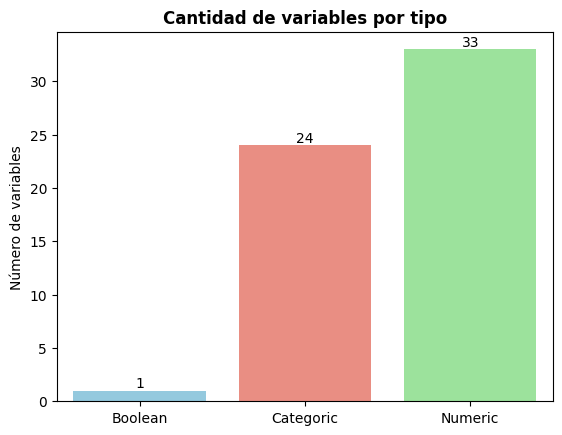

In [141]:
fig, ax = plt.subplots()
sns.barplot(data=var_types_count,x='Var_type',y='Count', palette=['skyblue','salmon','lightgreen'], ax=ax, hue='Var_type')
ax.set_title('Cantidad de variables por tipo', weight='bold')
ax.set_ylabel('Número de variables')
ax.set_xlabel('')
for i in ax.containers:
    ax.bar_label(i,fmt='{:,.0f}')
plt.show()

## Nulls

In [142]:
def nulls_detection(df, style=True):
    """
    ---------------------------------------------------------------------------------------
    nulls_detection function
    ---------------------------------------------------------------------------------------
    This function takes a dataframe as input and returns a styled pandas dataframe with the
    count and percentage of missing values in each column.

    Parameters
        - df: pandas dataframe to be analyzed

    Returns
        - nulls: styled pandas dataframe with the count and percentage of missing values
        in each column
    """
    nulls = (pd.DataFrame(df.isnull()
                        .sum()
                        .where(lambda x: x>=1)
                        .dropna()
                        ,columns=['Missing Values'])
            .sort_values(by='Missing Values', ascending=False))
    nulls['Percentage'] = nulls['Missing Values']/df.shape[0]
    nulls['Type'] = df[nulls.index].dtypes

    if style:
        nulls = (nulls
                .style.format({'Missing Values':"{:.0f}",'Percentage': "{:.2%}"})
                .background_gradient(cmap='YlOrRd'))

    return nulls

In [143]:
nulls = nulls_detection(train, style=False)
nulls_detection(train, style=True)

,Missing Values,Percentage,Type
AgeHH1,909,1.78%,float64
AgeHH2,909,1.78%,float64
PercChangeMinutes,367,0.72%,float64
PercChangeRevenues,367,0.72%,float64
MonthlyRevenue,156,0.31%,float64
MonthlyMinutes,156,0.31%,float64
TotalRecurringCharge,156,0.31%,float64
DirectorAssistedCalls,156,0.31%,float64
OverageMinutes,156,0.31%,float64
RoamingCalls,156,0.31%,float64


Son muy pocos y en general todos se podrían suplantar por la mediana excepto ServiceArea que es un código. Veremos si es útil o no

In [144]:
train[nums] = train[nums].fillna(train[nums].median()).copy()
train[cats] = train[cats].fillna(train[cats].mode().iloc[0]).copy()

In [145]:
nulls_detection(train)

,Missing Values,Percentage,Type


In [146]:
# /miniconda3/envs/test_rodri

## Outliers

In [174]:
fr.outliers_detection(df=train, list_vars=nums, target='Churn', multiplier=3)

,0.000000,1.000000,variable,sum_outlier_values,percentaje_sum_outlier_values
31,0.731544,0.268456,ReferralsMadeBySubscriber,2384,0.046702
0,0.549570,0.450430,RetentionCalls,1745,0.034184
1,0.758050,0.241950,Handsets,1149,0.022509
2,0.670599,0.329401,PercChangeMinutes,1102,0.021588
3,0.786317,0.213683,ReceivedCalls,1067,0.020902
4,0.773694,0.226306,OffPeakCallsInOut,1034,0.020256
5,0.737589,0.262411,DroppedCalls,987,0.019335
6,0.758197,0.241803,InboundCalls,976,0.019120
7,0.754872,0.245128,UnansweredCalls,975,0.019100
8,0.757764,0.242236,OutboundCalls,966,0.018924


In [ ]:
train.shape

(51047, 58)

In [195]:
outliers_index = fr.outliers_detection(df=train, list_vars=nums, target='Churn', list_out=True, multiplier=3)
# para fines de visualización elimino todos los registros con outliers, por eso elijo list_threshold=0
len(outliers_index)

12193

Ninguno parece sobresalir más que el primero, que tiene algunos con valor 35, sin problema y RetentionCalls que será la variable treatment, por lo que se convertirá en binaria (se realizaron o no llamadas de intento de retención de cliente). En base a esto, para el modelo final se probará su eliminación o reemplazo por algún valor a elegir, pero en principio no debería producir cambios significativos. En cambio, para su visualización seguramente si, por lo que se utilizará una función de extracción de outliers para mejorar los gráficos a exponer.

In [196]:
train_no_outliers = train.drop(outliers_index, axis=0).copy()
outliers = train.loc[outliers_index].copy()
train_no_outliers.shape, outliers.shape

((38854, 58), (12193, 58))

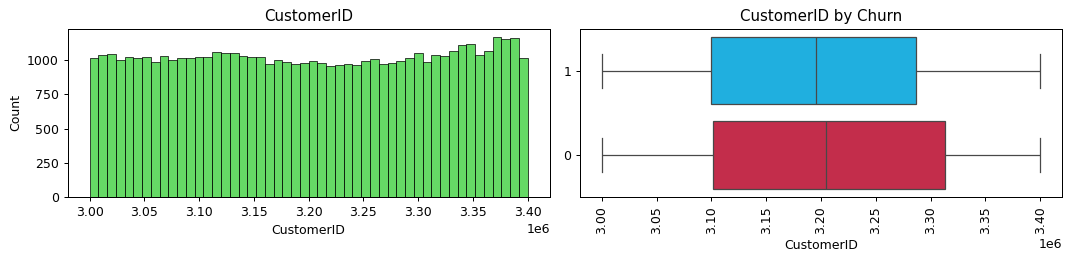

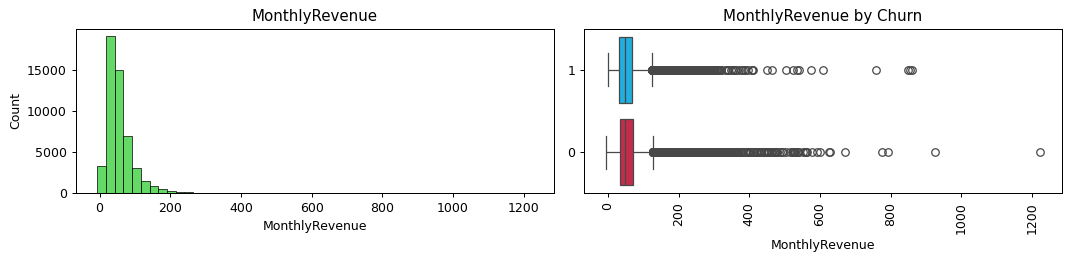

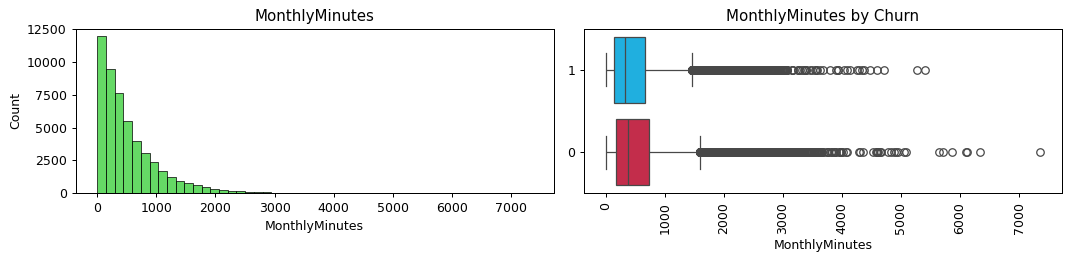

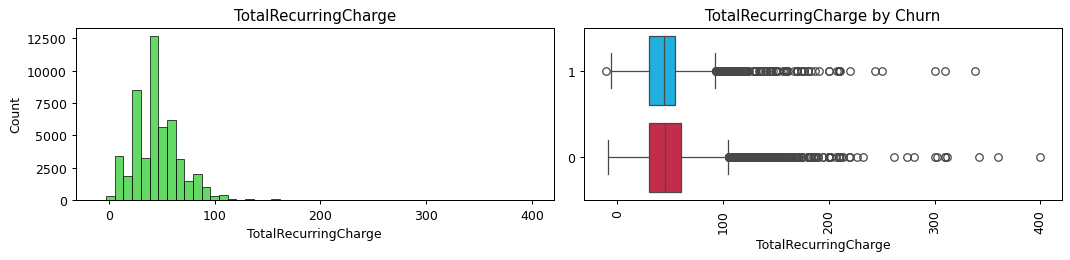

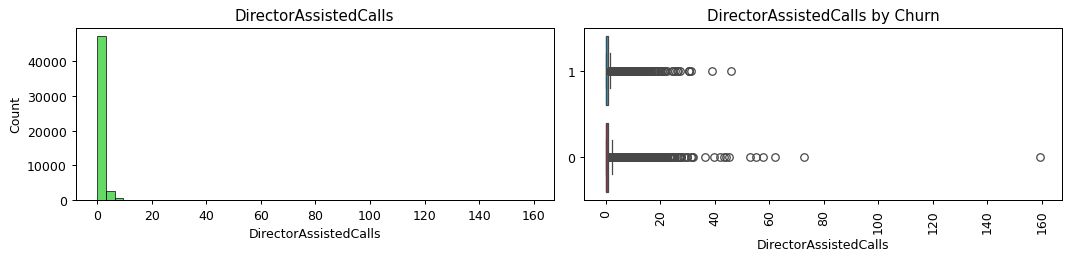

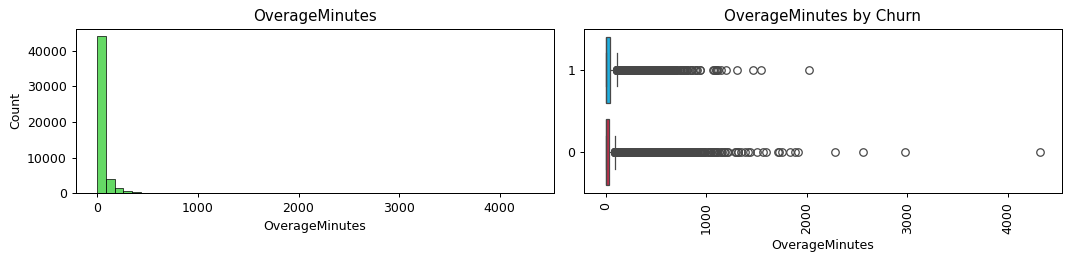

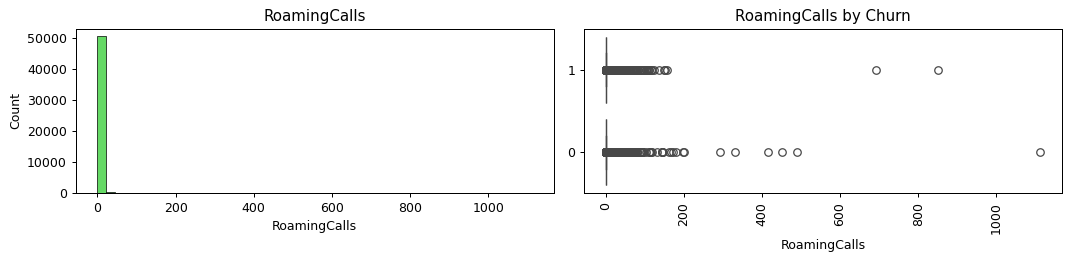

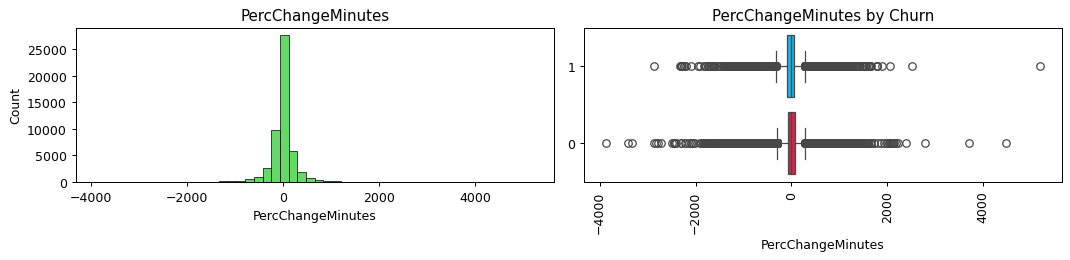

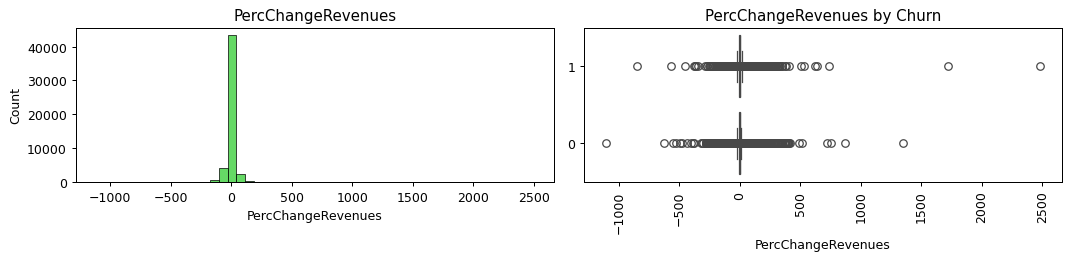

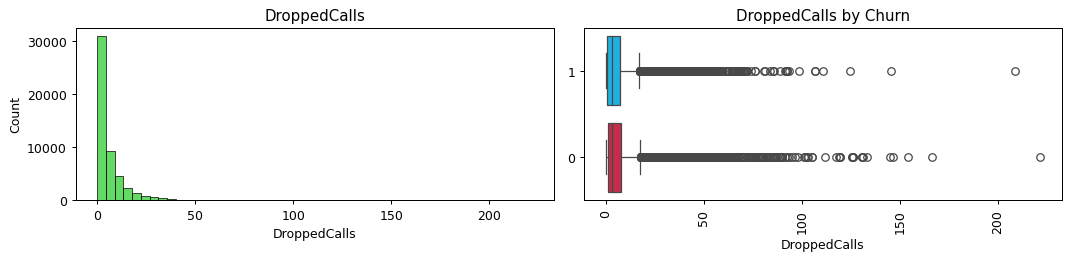

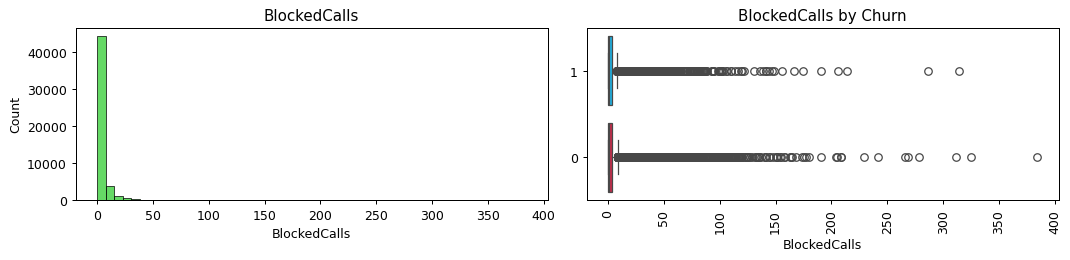

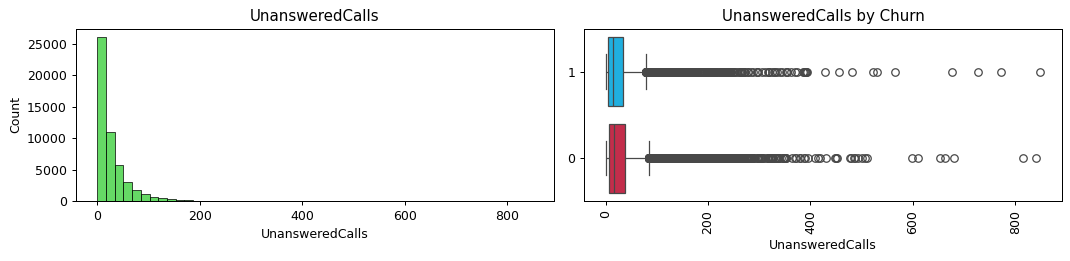

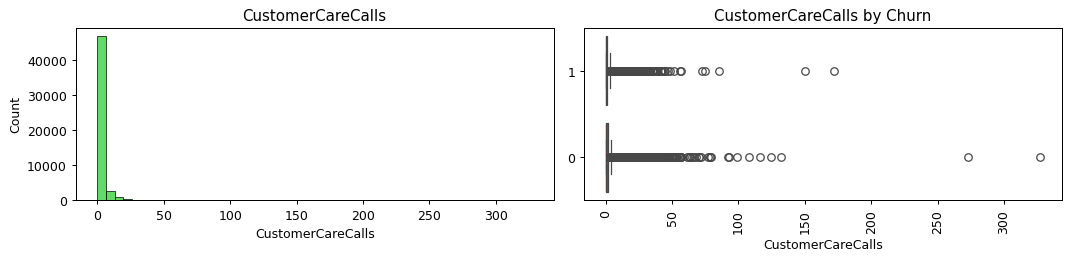

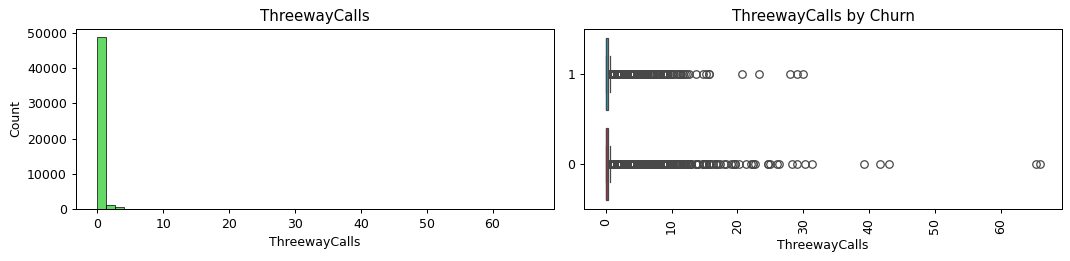

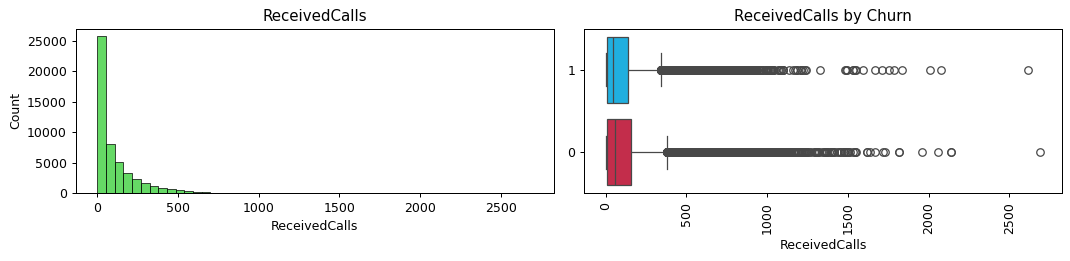

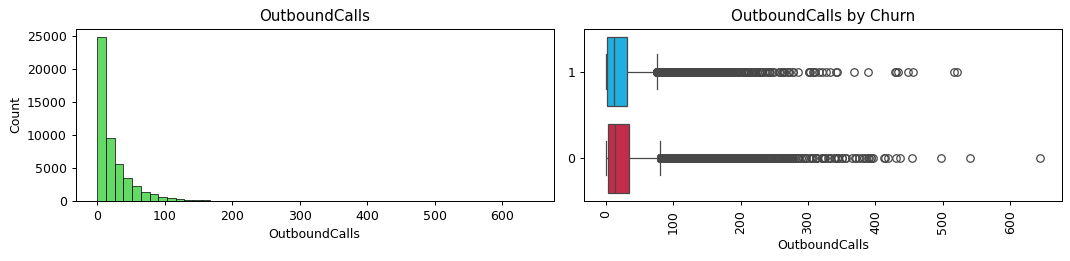

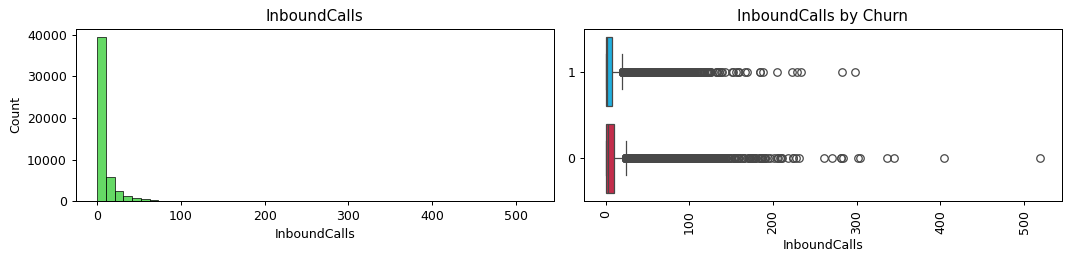

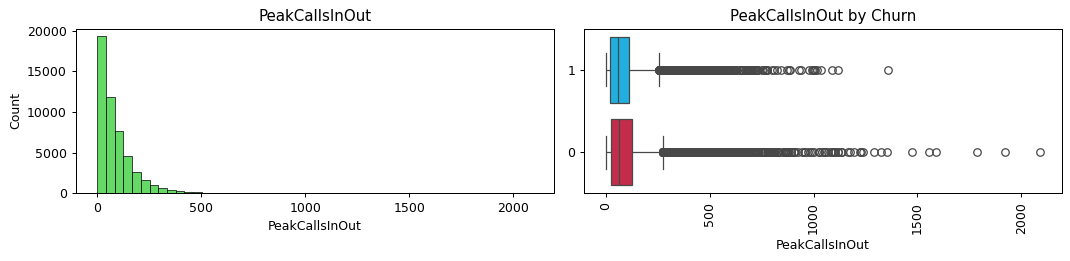

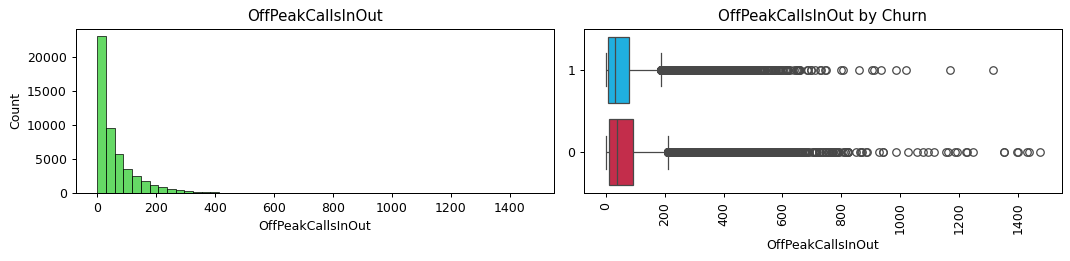

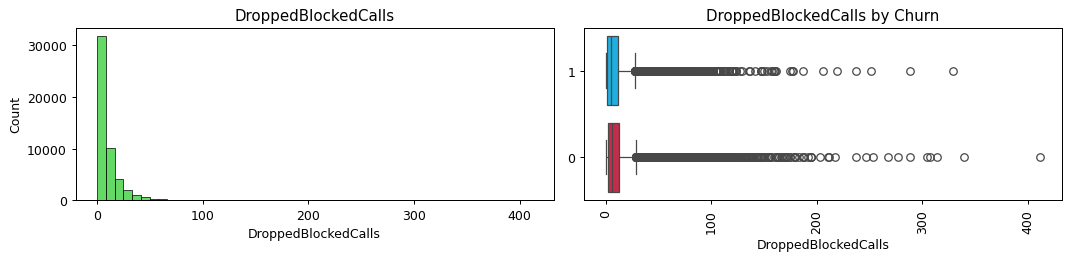

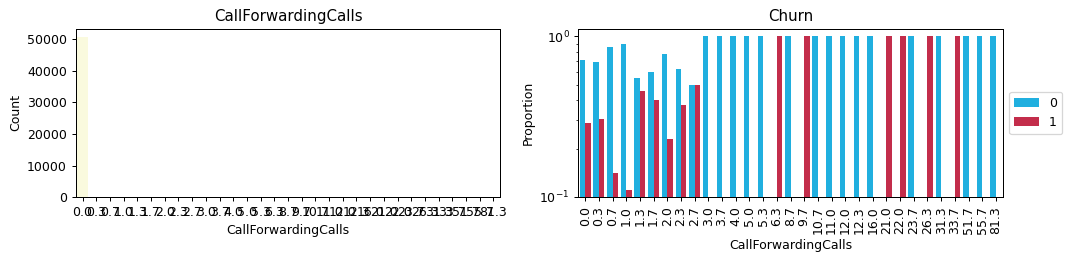

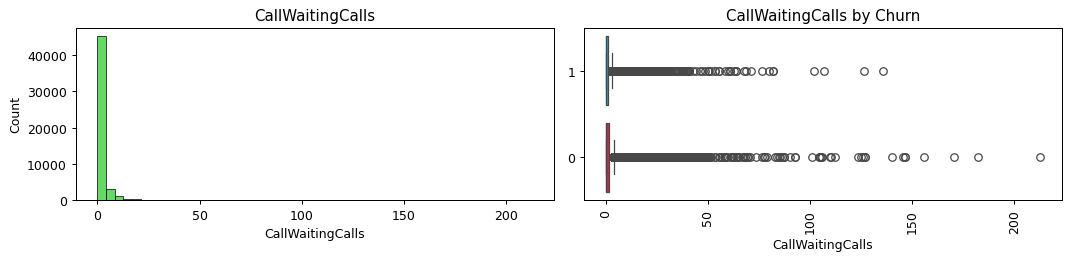

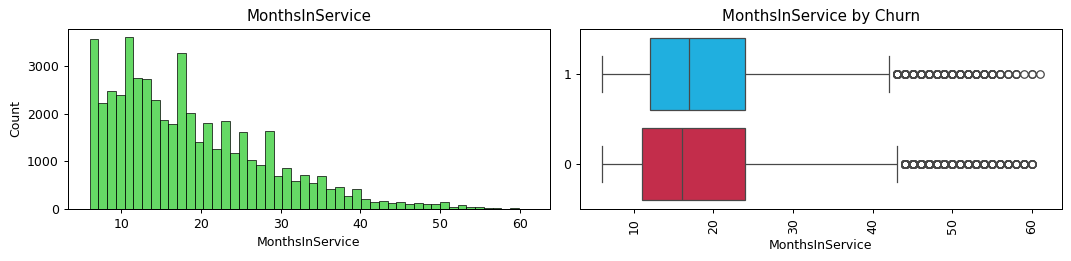

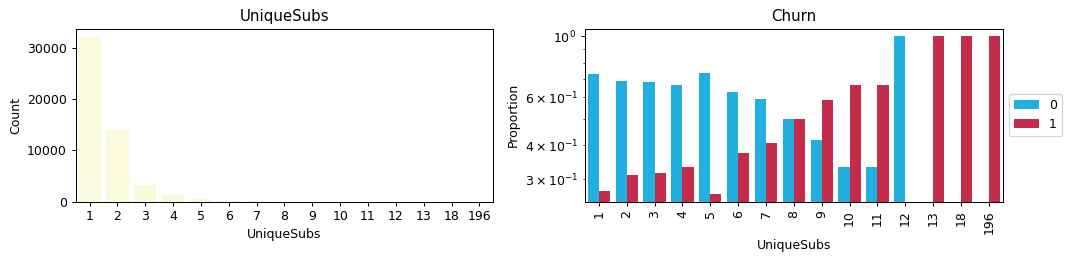

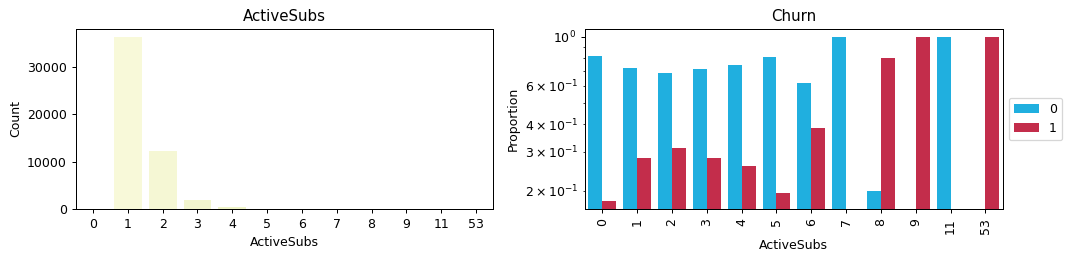

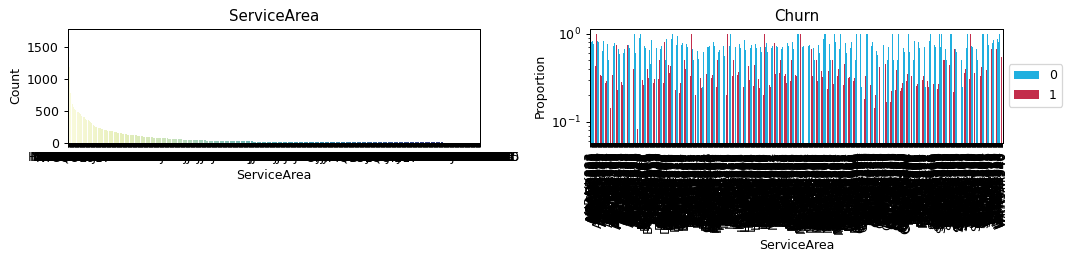

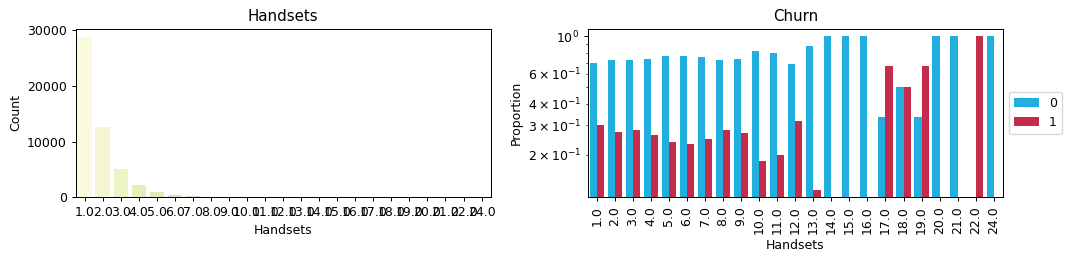

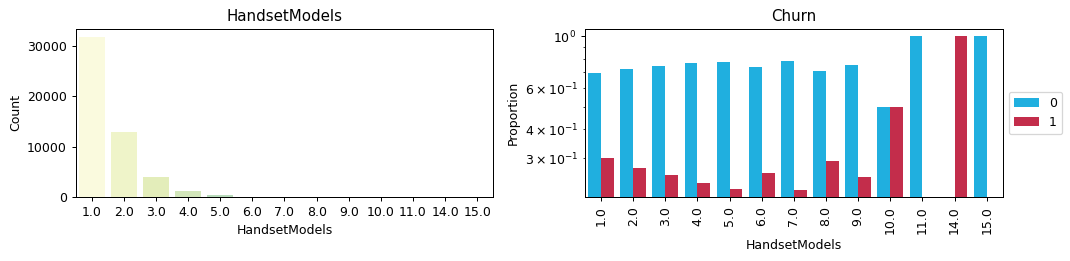

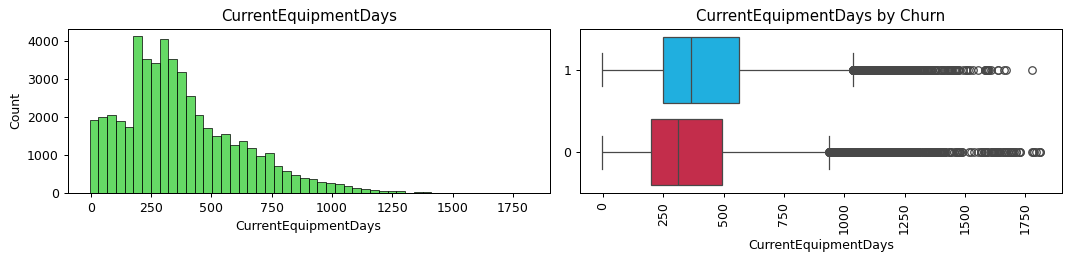

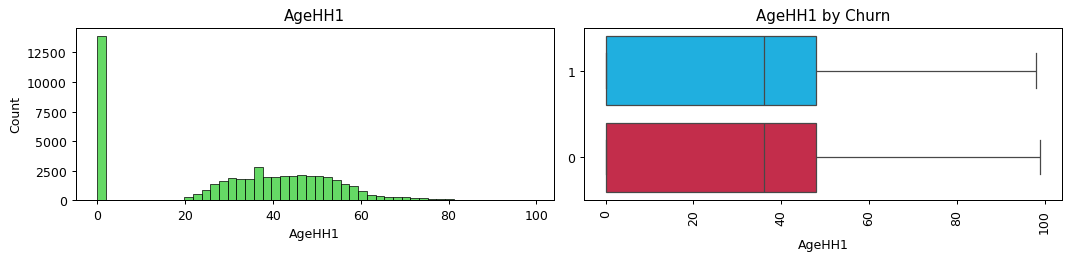

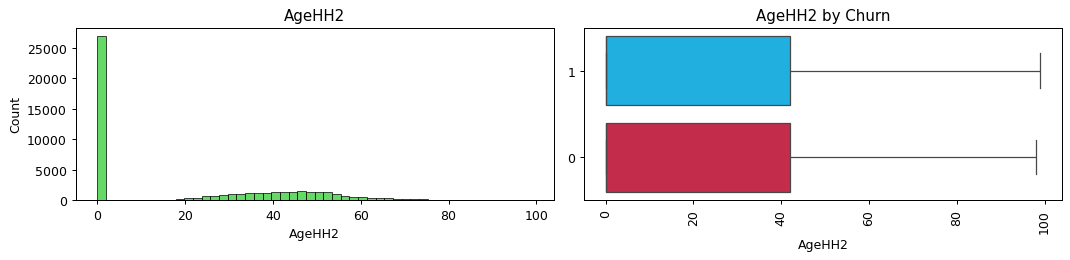

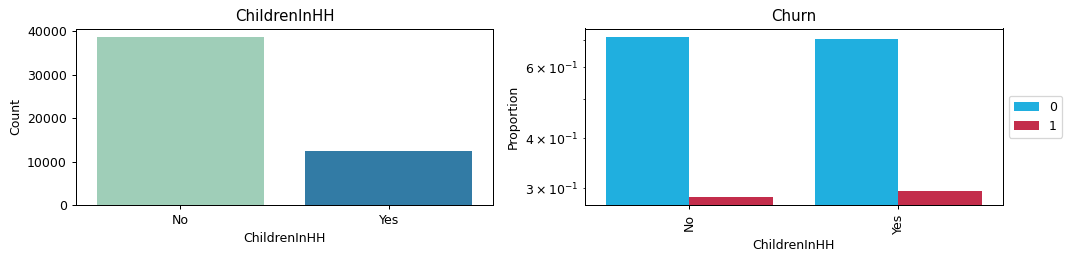

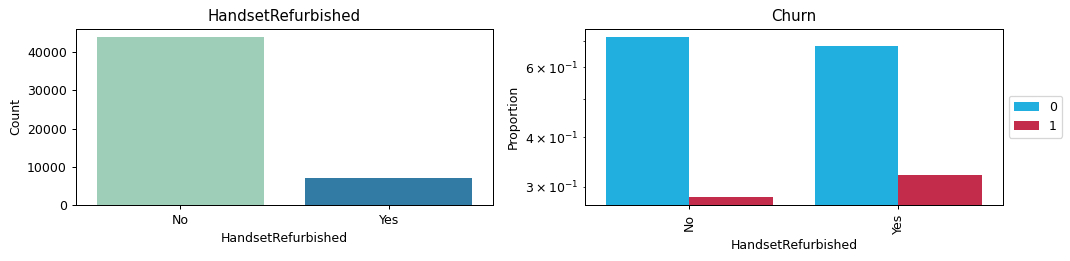

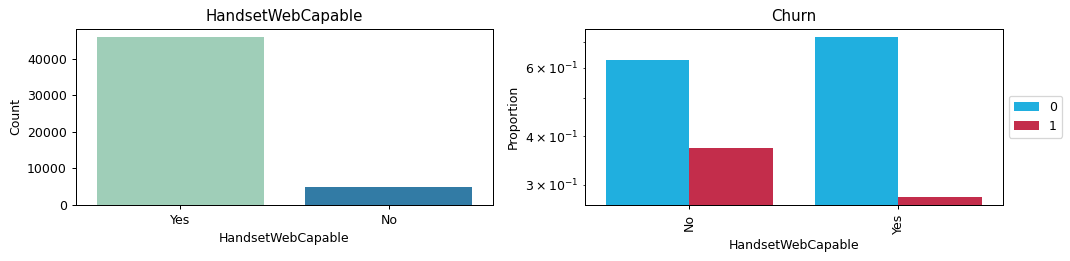

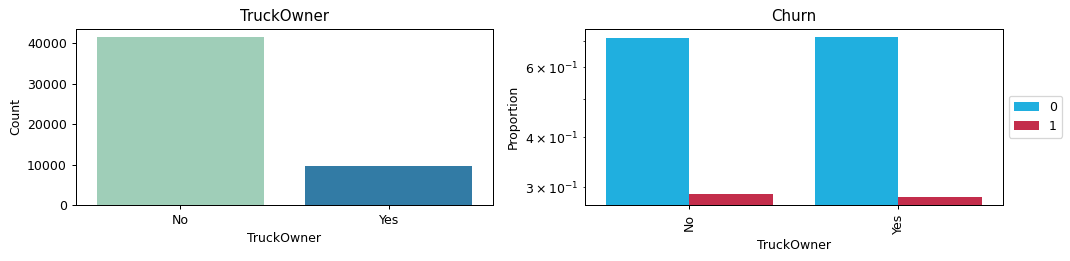

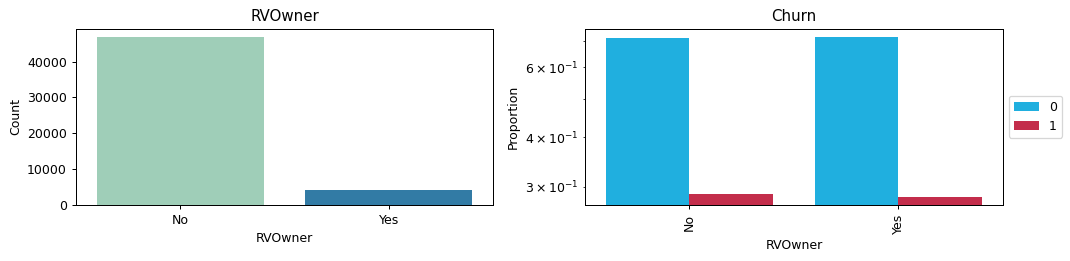

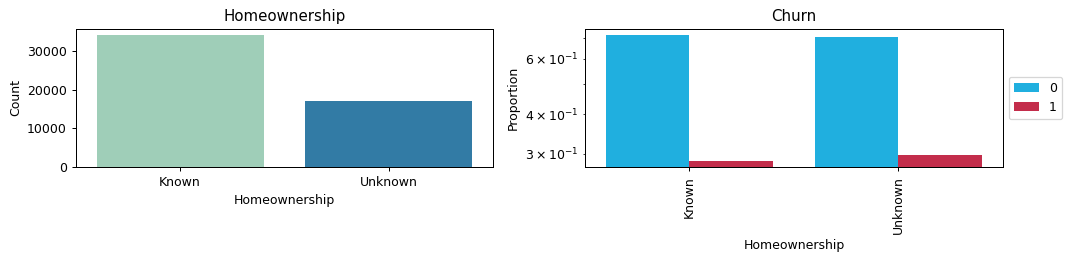

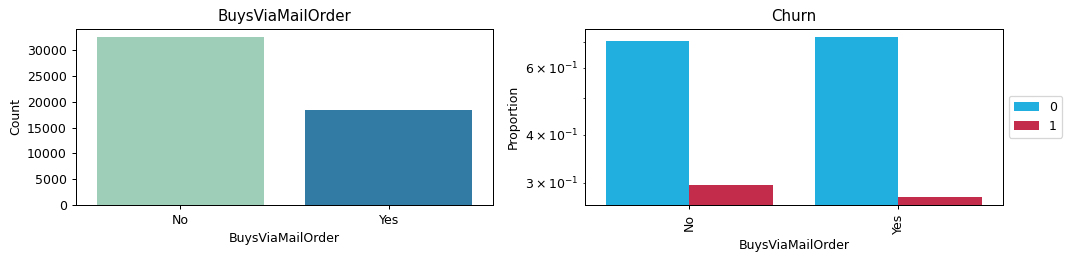

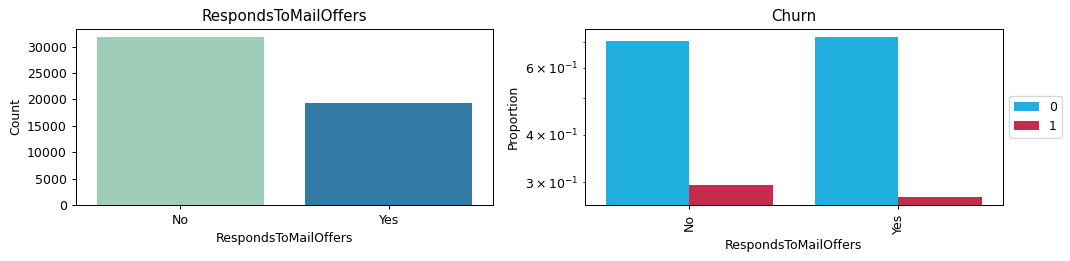

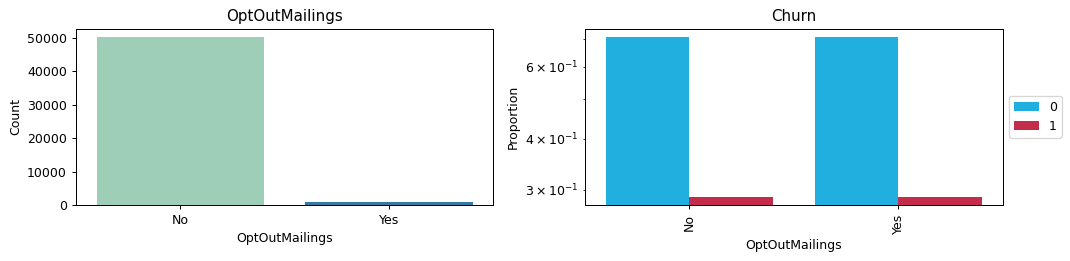

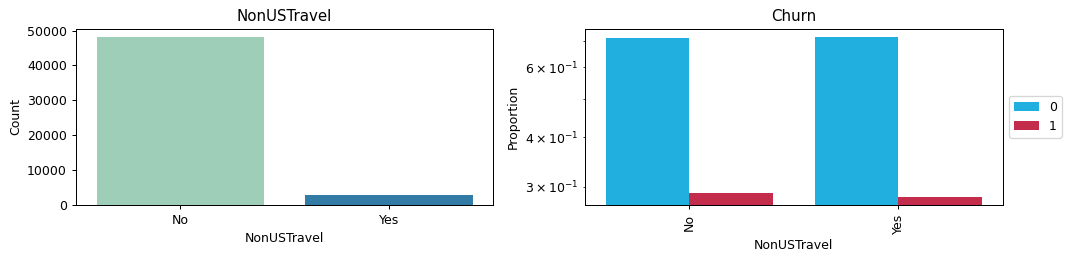

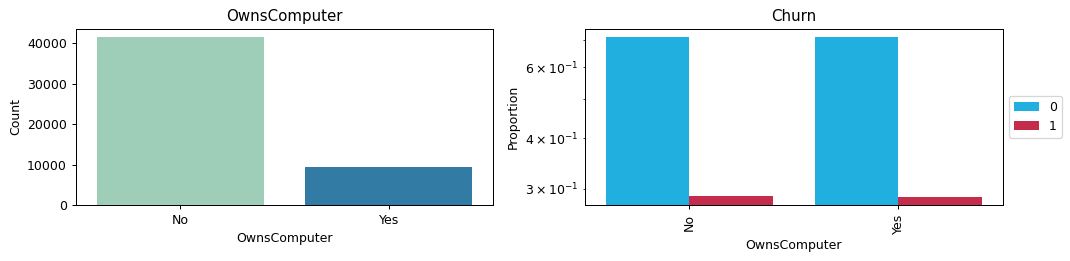

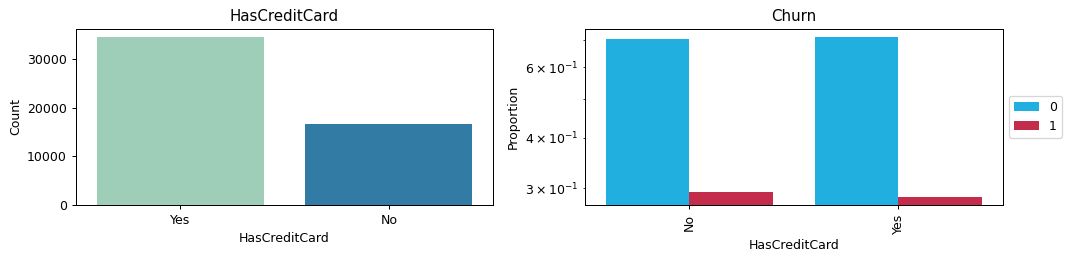

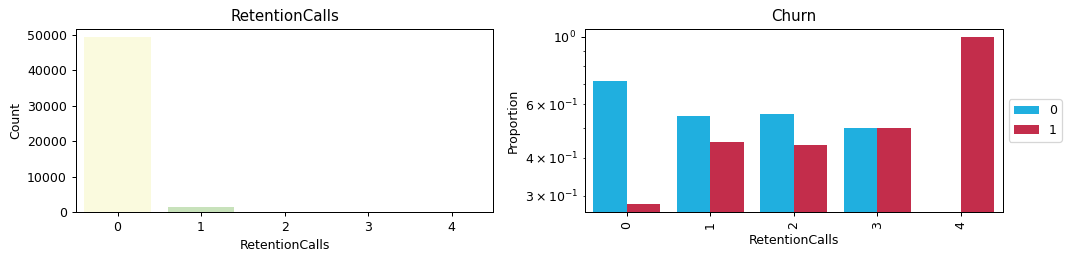

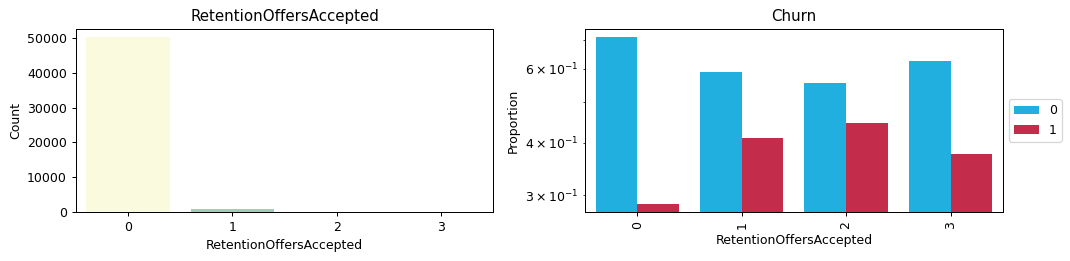

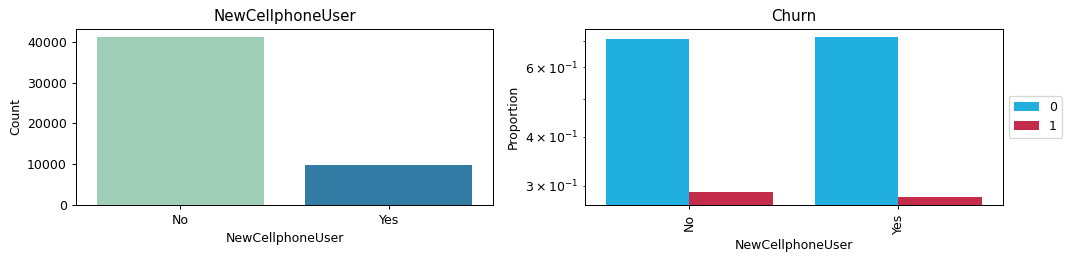

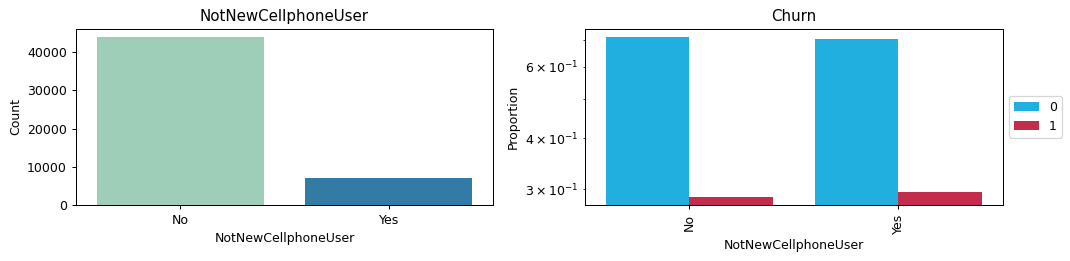

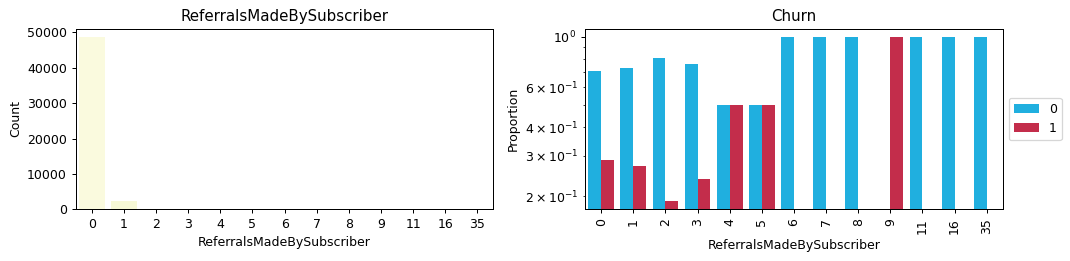

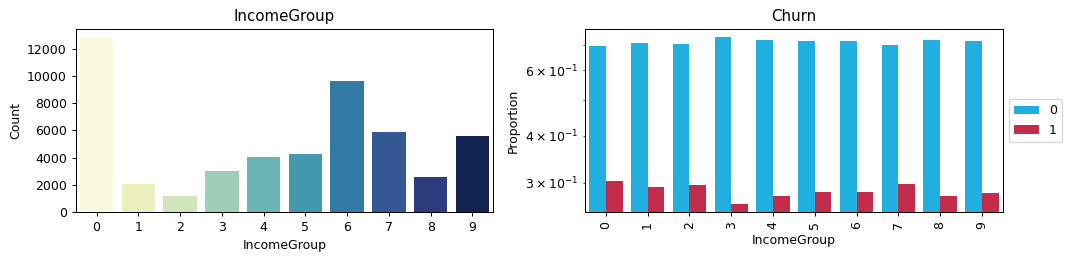

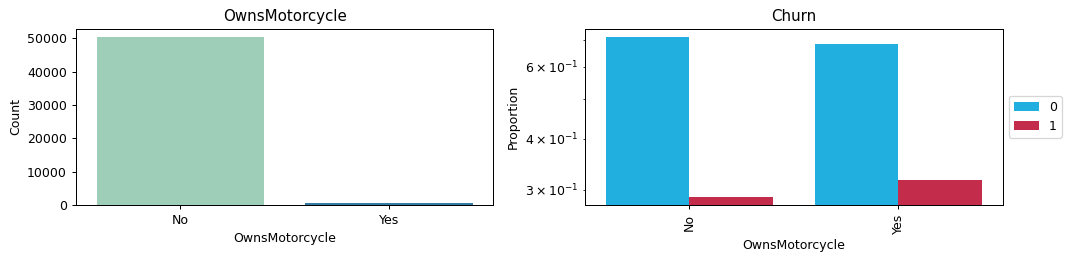

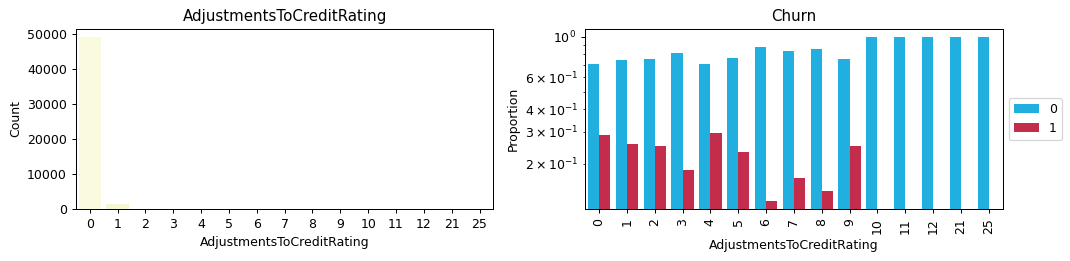

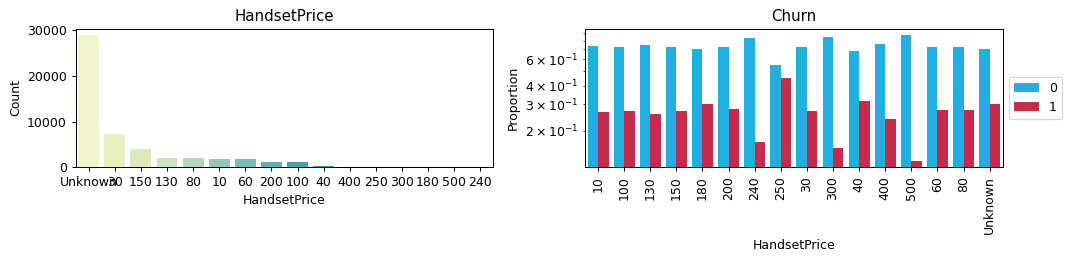

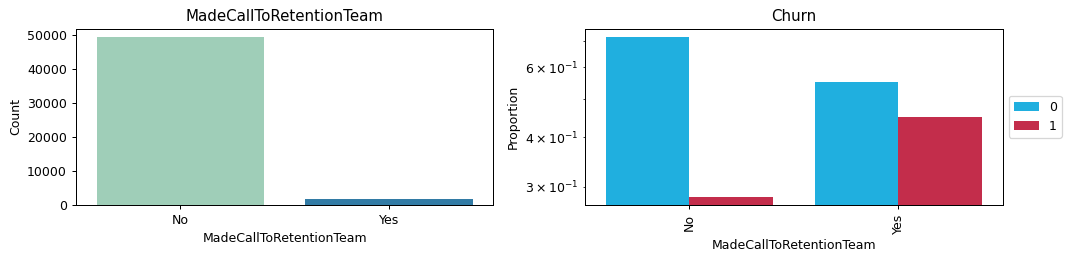

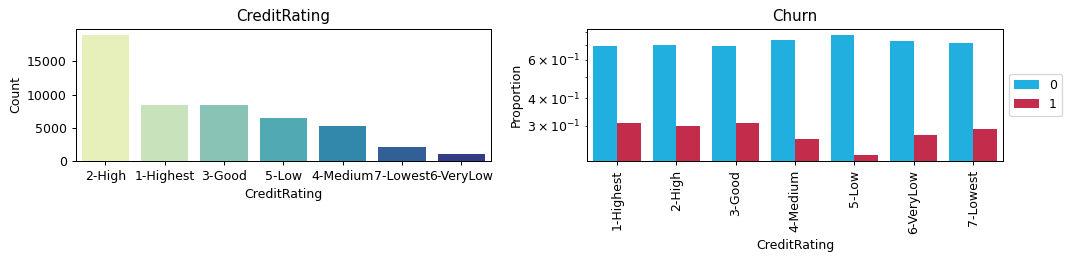

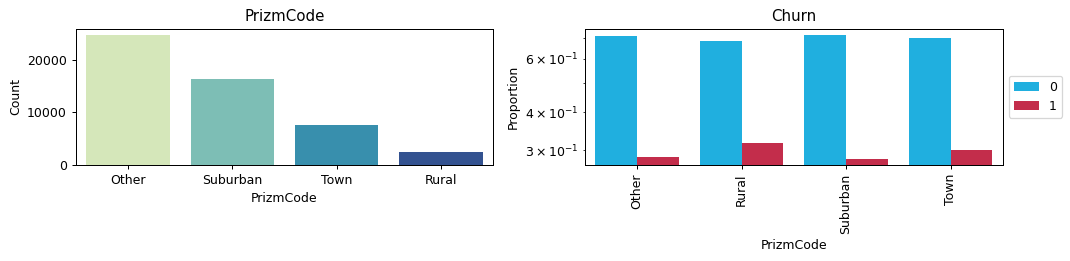

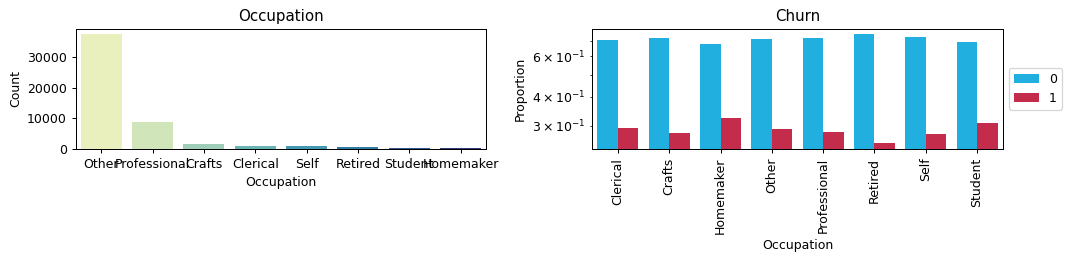

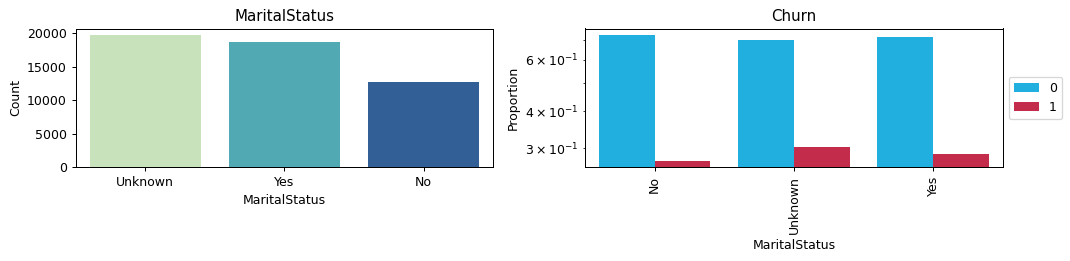

CPU times: total: 24.3 s
Wall time: 35.3 s


In [280]:
%%time
warnings.filterwarnings('ignore')
for i in list(train.columns):
    if i in nums:
        fr.double_plot(train, col_name=i, is_cont=True, target='Churn')
    elif  ((i in bools) | (i in cats)) & (i!='Churn'):
        fr.double_plot(train, col_name=i, is_cont=False, target='Churn')

In [279]:
train.MadeCallToRetentionTeam.value_counts(normalize=True)

MadeCallToRetentionTeam
No     0.965816
Yes    0.034184
Name: proportion, dtype: float64

In [248]:
corr = pd.concat([train[nums],train.Churn], axis=1).corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallWaitingCalls,MonthsInService,CurrentEquipmentDays,AgeHH1,AgeHH2,CallForwardingCalls,UniqueSubs,ActiveSubs,Handsets,HandsetModels,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,Churn
CustomerID,1.000000,0.000636,0.083995,0.051149,-0.005680,0.004383,0.000839,-0.007949,0.005277,0.064699,0.038096,0.084857,0.119828,0.057236,0.041191,0.036676,0.025632,-0.011116,0.098485,0.065995,0.022614,-0.752283,-0.401359,-0.112299,-0.088431,0.000587,-0.024854,-0.041581,-0.281757,-0.290884,-0.060742,-0.046293,0.008010,-0.041558
MonthlyRevenue,0.000636,1.000000,0.712968,0.629835,0.407372,0.787865,0.303638,-0.027392,-0.016557,0.429911,0.232162,0.449610,0.189039,0.200670,0.604635,0.494493,0.373571,0.640922,0.471562,0.416785,0.468730,-0.002305,-0.217373,-0.105784,-0.106391,0.011413,-0.014309,-0.041631,0.242457,0.235636,0.011142,0.015402,0.018933,-0.012214
MonthlyMinutes,0.083995,0.712968,1.000000,0.584014,0.392377,0.571582,0.112722,-0.045125,-0.040702,0.593126,0.318009,0.645437,0.375658,0.288409,0.828031,0.693354,0.557527,0.770326,0.763910,0.572790,0.614813,-0.068506,-0.310101,-0.160494,-0.142221,0.018664,-0.029803,-0.065828,0.301769,0.291961,0.009560,0.014874,0.067452,-0.050384
TotalRecurringCharge,0.051149,0.629835,0.584014,1.000000,0.311077,0.202951,0.073767,-0.016129,-0.025502,0.352390,0.178886,0.357709,0.152470,0.148592,0.480432,0.408444,0.306259,0.550819,0.367319,0.333693,0.354574,-0.047954,-0.247995,-0.103210,-0.101194,0.014085,-0.020661,-0.056717,0.233702,0.225111,-0.022028,-0.002306,0.036715,-0.061254
DirectorAssistedCalls,-0.005680,0.407372,0.392377,0.311077,1.000000,0.287366,0.070091,-0.026073,-0.016037,0.263450,0.139936,0.304613,0.093301,0.132401,0.280689,0.315140,0.186031,0.418529,0.273295,0.252728,0.305112,0.017861,-0.121587,-0.057514,-0.058179,0.002323,-0.002697,-0.014810,0.184442,0.172056,0.008477,0.013311,-0.001083,-0.019788
OverageMinutes,0.004383,0.787865,0.571582,0.202951,0.287366,1.000000,0.064085,-0.028412,-0.018636,0.331685,0.190500,0.362670,0.137771,0.163859,0.515630,0.405672,0.319870,0.517877,0.390641,0.329256,0.456640,0.001236,-0.124260,-0.063302,-0.063191,0.003702,-0.002879,-0.012533,0.142617,0.143260,0.014811,0.009279,0.010081,0.016008
RoamingCalls,0.000839,0.303638,0.112722,0.073767,0.070091,0.064085,1.000000,-0.053848,-0.090721,0.068502,0.029203,0.039327,0.020460,0.024516,0.045897,0.045332,0.019837,0.062661,0.031633,0.060832,0.035981,-0.010866,-0.029030,-0.010196,-0.013209,0.003243,-0.003860,-0.003190,0.024343,0.022872,-0.002067,-0.000816,-0.006843,0.010723
PercChangeMinutes,-0.007949,-0.027392,-0.045125,-0.016129,-0.026073,-0.028412,-0.053848,1.000000,0.609519,-0.081111,-0.055366,-0.086126,-0.039963,-0.028904,-0.106330,-0.063543,-0.070678,-0.109553,-0.089024,-0.087144,-0.129588,0.004069,-0.006167,0.014070,0.003614,-0.004799,0.001805,0.008515,-0.012494,-0.012229,-0.021247,-0.008209,-0.001978,-0.033895
PercChangeRevenues,0.005277,-0.016557,-0.040702,-0.025502,-0.016037,-0.018636,-0.090721,0.609519,1.000000,-0.037290,-0.033033,-0.055766,-0.032508,0.013153,-0.079477,-0.041632,-0.047392,-0.080690,-0.052543,-0.045726,-0.093941,-0.006921,0.005798,0.006732,0.002391,-0.002364,0.002532,0.005129,-0.018096,-0.017873,-0.019110,-0.012163,-0.001785,0.011154
DroppedCalls,0.064699,0.429911,0.593126,0.352390,0.263450,0.331685,0.068502,-0.081111,-0.037290,1.000000,0.185124,0.543263,0.294747,0.264223,0.517854,0.564465,0.394289,0.574093,0.601072,0.715420,0.396783,-0.046175,-0.216536,-0.117797,-0.107388,0.004301,-0.021223,-0.049663,0.225186,0.217869,0.020308,0.014858,0.029546,-0.015397


In [205]:
help(fr.plot_corr)

Help on function plot_corr in module functions_rfc:

plot_corr(corr, title='Matriz de correlaciones', figsize=(14, 8), target_text=False, annot_floor=0.4, annot_all=False)
    ----------------------------------------------------------------------------------------------------------
    Función plot_corr:
    ----------------------------------------------------------------------------------------------------------
    - Funcionamiento:
        La función recibe una matriz de correlaciones y genera un gráfico tipo heatmap en base a ella.
        Se pueden determinar el título, tamaño del gráfico, y que cuadrantes tengan o no el valor de la
        correlación.
    - Inputs:
        - corr: Dataframe de la matriz de correlaciones
        - title: Título elegido. Por defecto será 'Matriz de correlaciones'
        - figsize: Tamaño del gráfico
        - target_text: Se debe activar si se desean mostrar todos los valores en los cuadrantes de la última
        fila de la matriz, en mi caso us

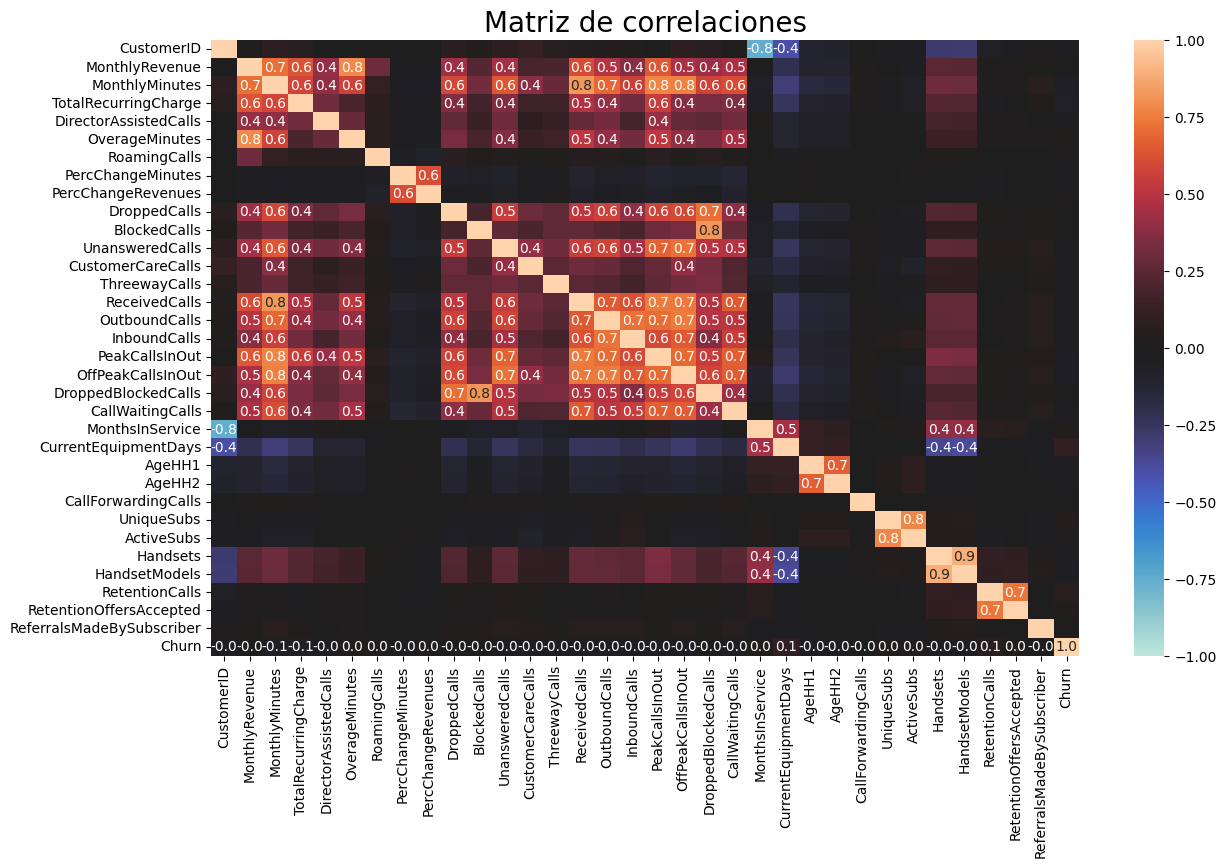

In [209]:
fr.plot_corr(corr, target_text=True)

No es menor que existan tantas correlaciones altas entre variables (y todas bajas con el target y el treatment). Probablemente sea necesario hacer tanto selección de variables como un buen feature engineering

In [249]:
new_corr = corr.copy()
new_corr.loc[:,:] = np.tril(new_corr, k=-1) # mantengo sólo una parte de las dos
new_corr = new_corr.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_corr[(new_corr['correlation']>=0.7) | (new_corr['correlation']<=-0.7)].style.background_gradient(cmap='coolwarm')

,level_0,level_1,correlation
1014,HandsetModels,Handsets,0.887839
478,ReceivedCalls,MonthlyMinutes,0.828031
656,DroppedBlockedCalls,BlockedCalls,0.816328
171,OverageMinutes,MonthlyRevenue,0.787865
944,ActiveSubs,UniqueSubs,0.775776
580,PeakCallsInOut,MonthlyMinutes,0.770326
614,OffPeakCallsInOut,MonthlyMinutes,0.763910
592,PeakCallsInOut,ReceivedCalls,0.746892
627,OffPeakCallsInOut,OutboundCalls,0.742311
626,OffPeakCallsInOut,ReceivedCalls,0.738185


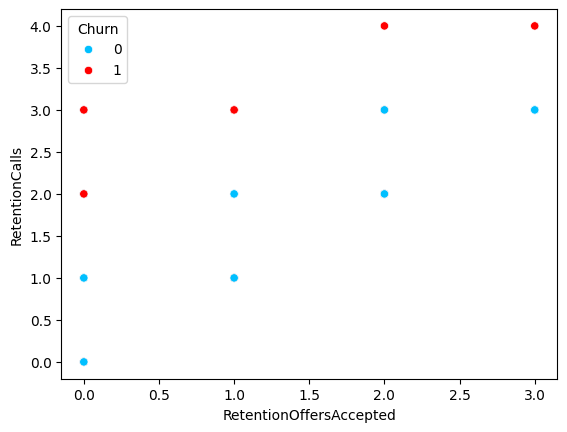

In [250]:
fig, ax = plt.subplots()
sns.scatterplot(data=train, x='RetentionOffersAccepted', y='RetentionCalls', hue='Churn', palette=['deepskyblue','red'], ax=ax)
plt.show()

In [255]:
pd.DataFrame(corr.loc['Churn'].sort_values(ascending=False)).style.background_gradient(cmap='RdBu_r', vmin=-1, vmax=1)

,Churn
Churn,1.000000
CurrentEquipmentDays,0.103690
RetentionCalls,0.065301
RetentionOffersAccepted,0.034953
UniqueSubs,0.034522
MonthsInService,0.018703
OverageMinutes,0.016008
ActiveSubs,0.015515
PercChangeRevenues,0.011154
RoamingCalls,0.010723


In [254]:
pd.DataFrame(corr.loc['RetentionCalls'].sort_values(ascending=False)).style.background_gradient(cmap='RdBu_r', vmin=-1, vmax=1)

,RetentionCalls
RetentionCalls,1.000000
RetentionOffersAccepted,0.734113
Handsets,0.102426
HandsetModels,0.101267
MonthsInService,0.069383
Churn,0.065301
UnansweredCalls,0.030330
CustomerCareCalls,0.026069
PeakCallsInOut,0.021051
DroppedCalls,0.020308


In [258]:
help(fr.corr_cat)

Help on function corr_cat in module functions_rfc:

corr_cat(df, target=None, target_transform=False, cat_cols=None)
    ----------------------------------------------------------------------------------------------------------
    Función corr_cat:
    ----------------------------------------------------------------------------------------------------------
    - Funcionamiento:
        La función recibe como un dataframe, detecta las variables categóricas y calcula una especie de
        matriz de correlaciones mediante el uso del estadístico Cramers V. En la función se incluye la
        posibilidad de que se transforme a la variable target a string si no lo fuese y que se incluya en la
        lista de variables a analizar. Esto último  puede servir sobre todo para casos en los que la variable
        target es un booleano o está codificada.
    - Inputs:
        -- df: DataFrame de Pandas a analizar
        -- target: String con nombre de la variable objetivo
        -- target_tra

In [264]:
sys.path.append('../src/')
importlib.reload(fr)
sys.path.remove('../src/')

In [260]:
crames_corr = fr.corr_cat(df=train, target='Churn', cat_cols=cats, target_transform=True)

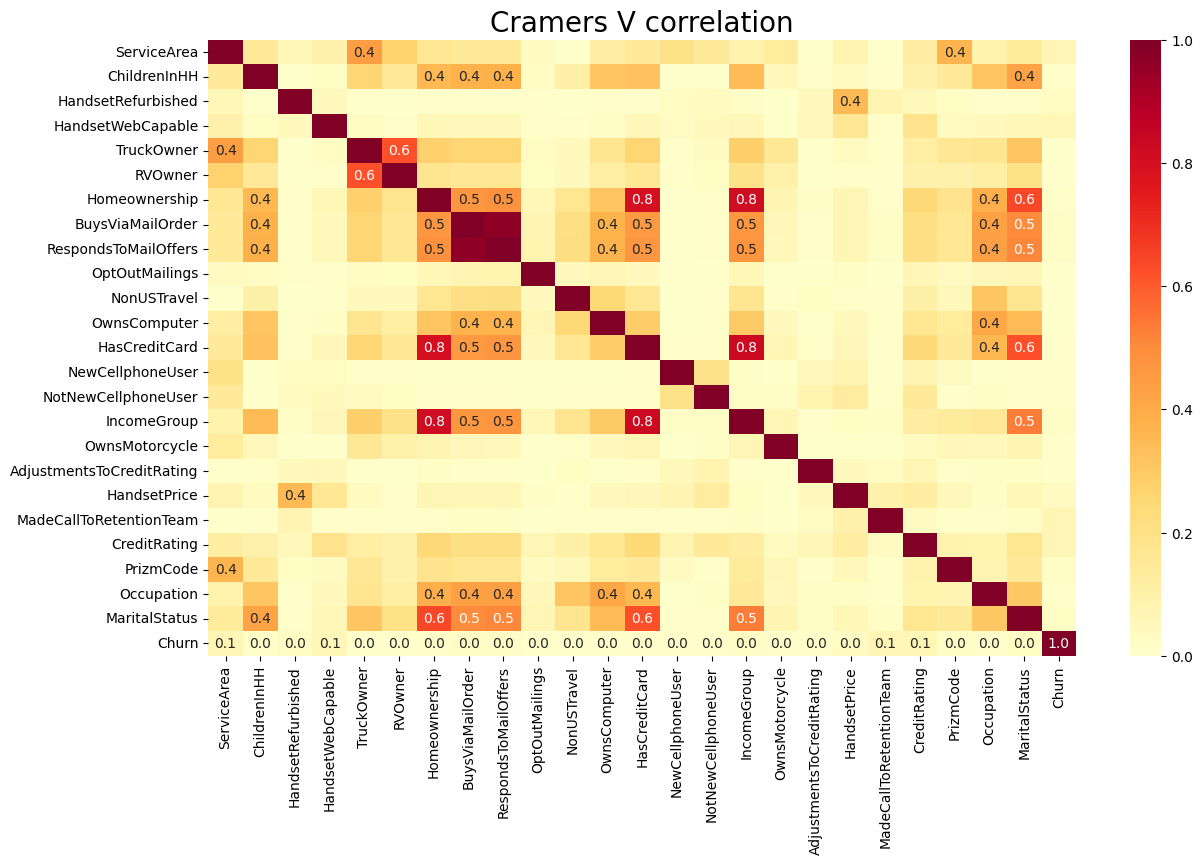

In [266]:
fr.plot_corr(crames_corr, target_text=True, cmap='YlOrRd', vmin=0, vmax=1, title='Cramers V correlation')

In [269]:
new_cram = crames_corr.copy()
new_cram.loc[:,:] = np.tril(new_cram, k=-1) # mantengo sólo una parte de las dos
new_cram = new_cram.stack().to_frame('correlation').reset_index().sort_values(by='correlation', ascending=False)
new_cram[(new_cram['correlation']>=0.5) | (new_cram['correlation']<=-0.5)].style.background_gradient(cmap='YlOrRd')

,level_0,level_1,correlation
207,RespondsToMailOffers,BuysViaMailOrder,0.967879
387,IncomeGroup,HasCreditCard,0.826552
381,IncomeGroup,Homeownership,0.818021
306,HasCreditCard,Homeownership,0.801101
581,MaritalStatus,Homeownership,0.637996
129,RVOwner,TruckOwner,0.621318
587,MaritalStatus,HasCreditCard,0.621238
590,MaritalStatus,IncomeGroup,0.534948
583,MaritalStatus,RespondsToMailOffers,0.508961
582,MaritalStatus,BuysViaMailOrder,0.500128
